In [1]:
#import all dependencies
%matplotlib inline
from IPython.display import Image
import import_ipynb
import plotly.plotly as py
import pandas as pd
import gmaps
import os

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
from datetime import date
from cleanup_allfunctions import buildmapbystatevio
from cleanup_allfunctions import gun_vio_locations
from cleanup_allfunctions import casualties_by_qtr_yr
from cleanup_allfunctions import gun_ownership_crime_report
from cleanup_allfunctions import build_victims_kil_stackedbar_state_year
from cleanup_allfunctions import build_victims_inj_stackedbar_state_year
from cleanup_allfunctions import casualty_plot
from cleanup_allfunctions import data_cleanup
from cleanup_allfunctions import read_create_df_st_bars
from cleanup_allfunctions import setread_csvfile
from utils.config import gkey

importing Jupyter notebook from cleanup_allfunctions.ipynb


In [2]:
#to winrar maine file 
import patoolib
patoolib.extract_archive("gun-violence-data.rar", outdir=".")
os.rename('gun-violence-data_01-2013_03-2018.csv', 'gun-violence-data.csv')


patool: Extracting gun-violence-data.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- C:\dev\projects\gun_violation\gun_violations\src\main\jupyter\com\rutgers\gunvio\gun-violence-data.rar
patool:     with cwd=.
patool: ... gun-violence-data.rar extracted to `.'.


In [3]:
#Data Cleanup
print("Starting Data Cleanup...........")
data_cleanup()
os.remove('gun-violence-data.csv')
print("Completed Data Cleanup...........")

Starting Data Cleanup...........
Completed Data Cleanup...........


Started plotting casualties by qtr / year


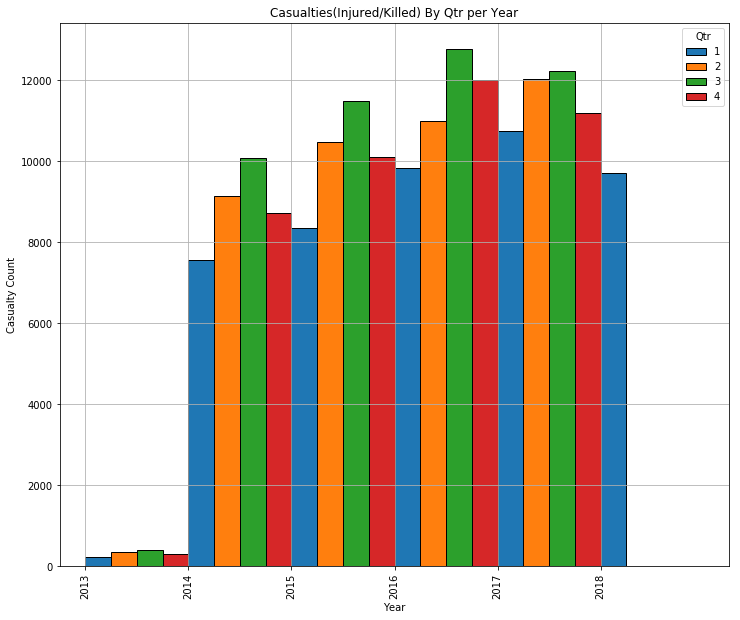

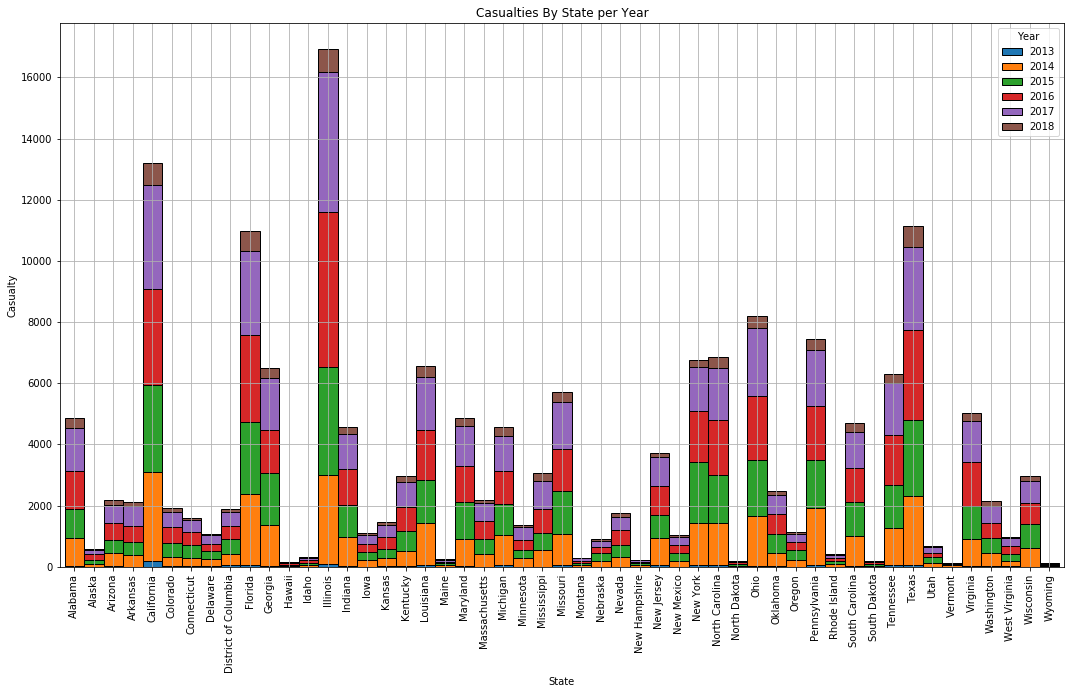

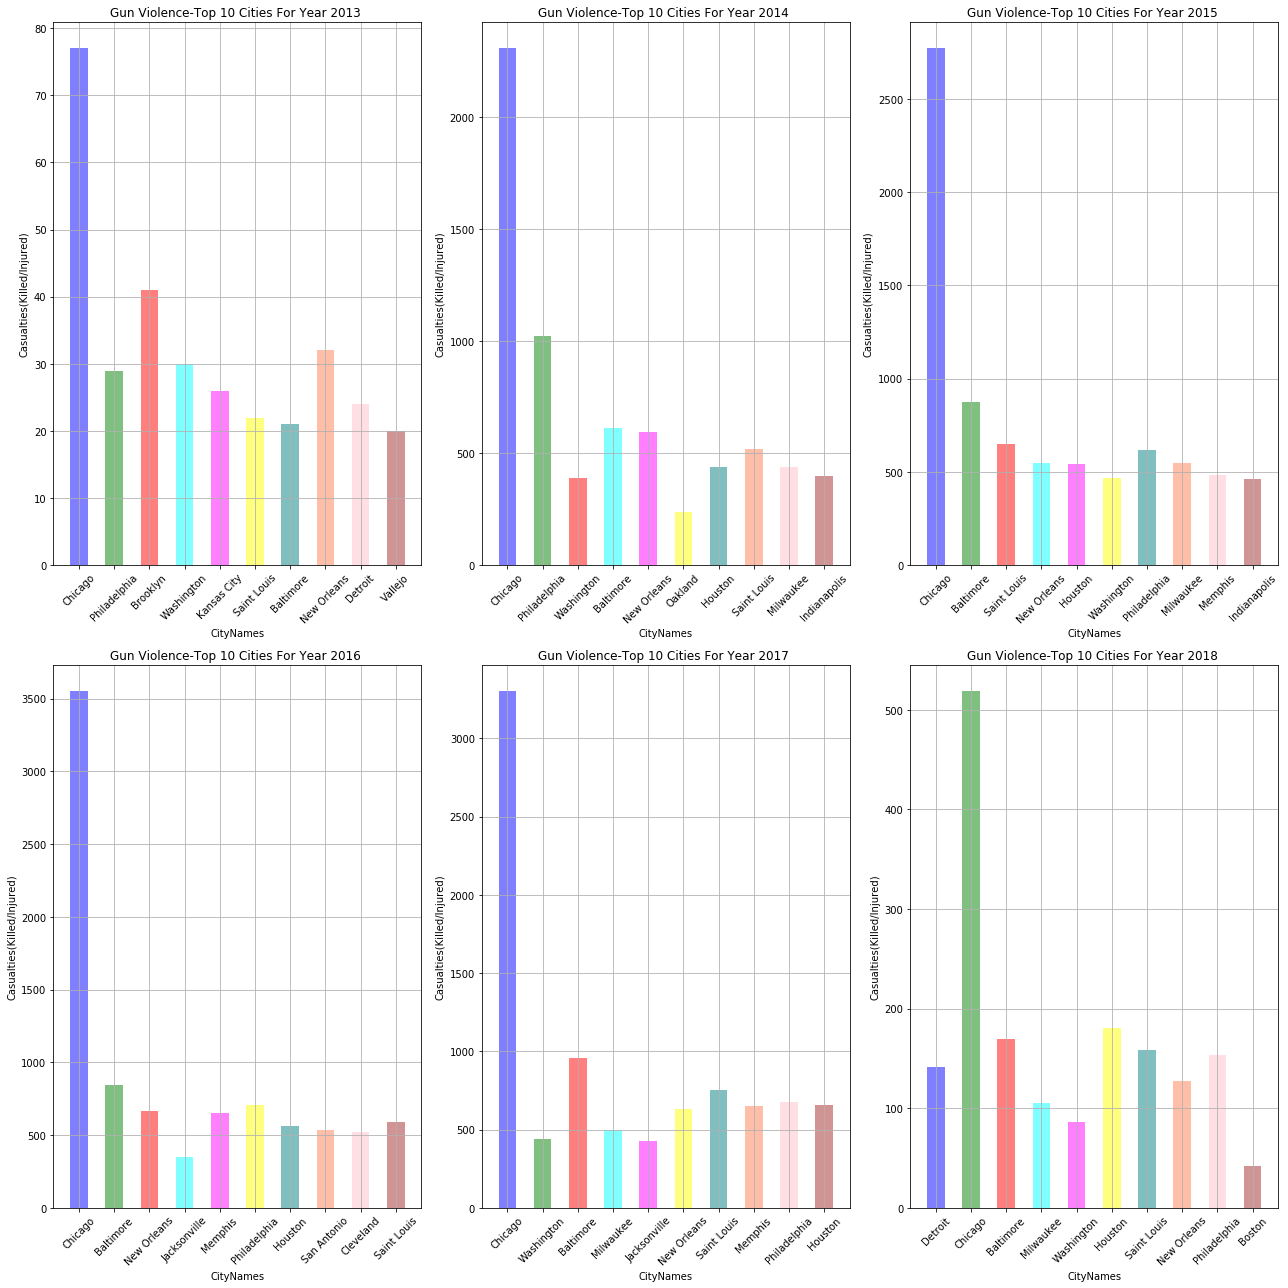

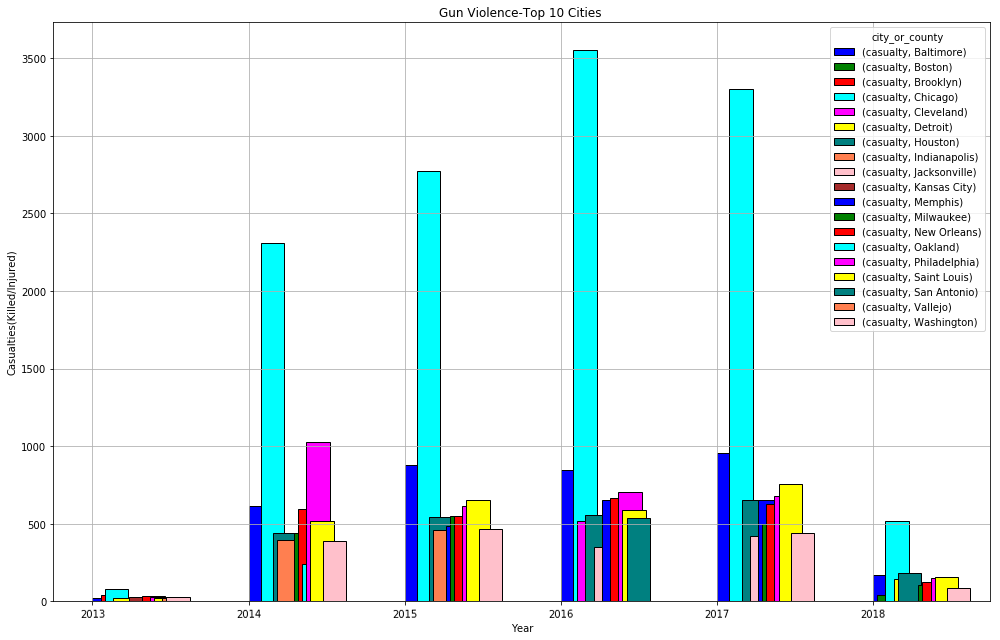

cleanup_allfunctions.ipynb:386: FutureWarning:

'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.



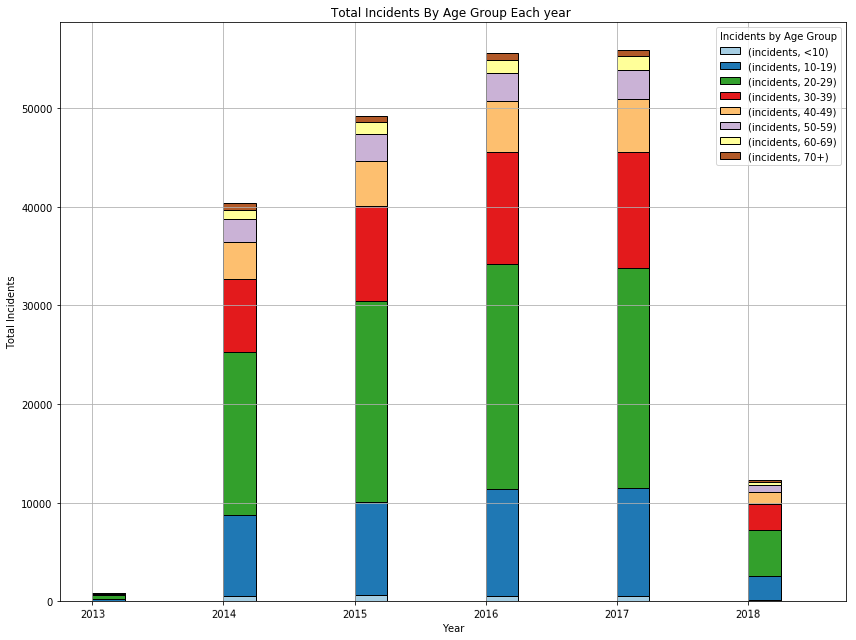

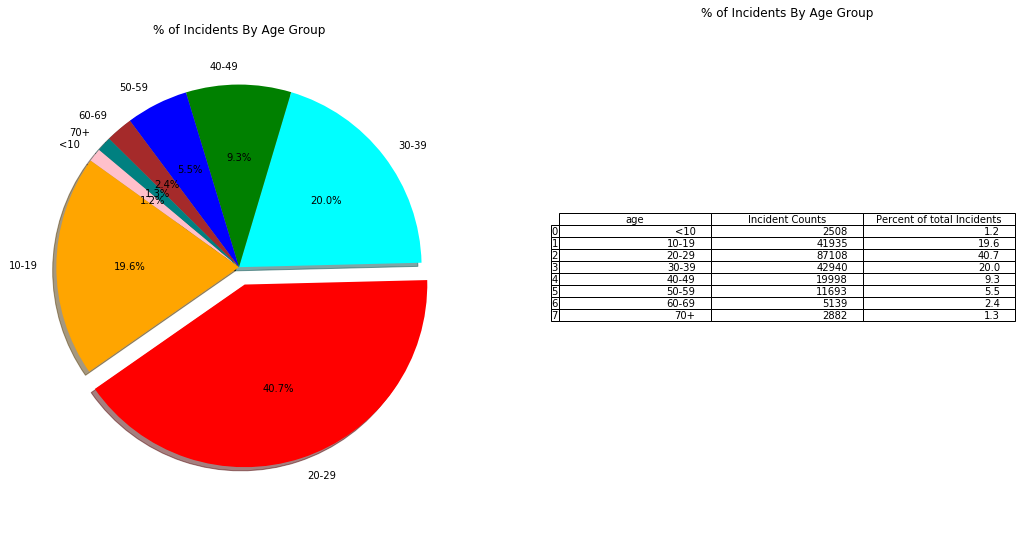

Completed plotting casualties by qtr / year


In [4]:
print("Started plotting casualties by qtr / year")
casualties_by_qtr_yr()
print("Completed plotting casualties by qtr / year")

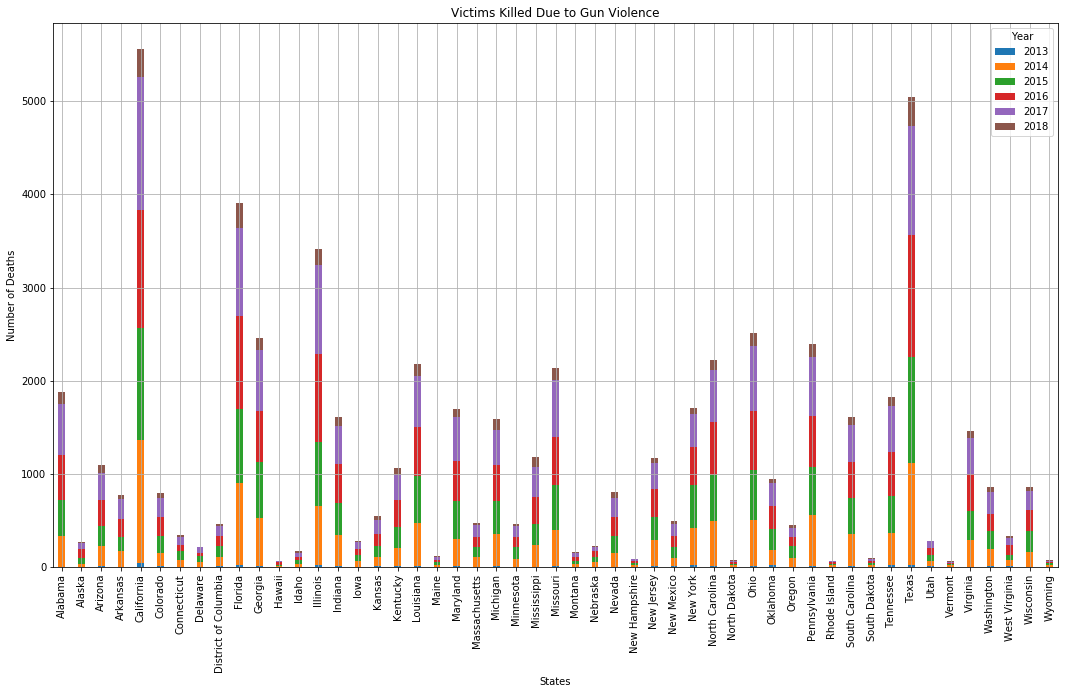

In [5]:
#Graph a stacked bar graph where the x-axis is each state and the stacked bars contain the victims killed for each year
casualties_by_year_df=read_create_df_st_bars(False)
ax=build_victims_kil_stackedbar_state_year(casualties_by_year_df)
ax.grid()

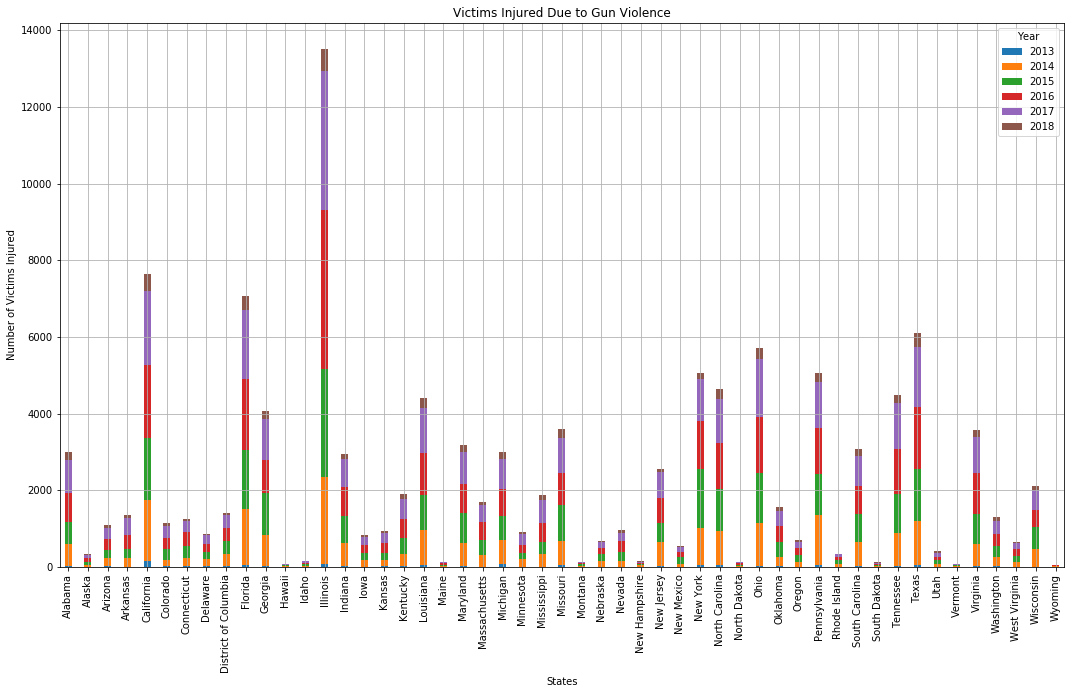

In [6]:
ax=build_victims_inj_stackedbar_state_year(casualties_by_year_df)
ax.grid()

Which state do you want to plot casualties for ? Please seperate states by a comma followed by a space.New Jersey
New Jersey
[2013, 2014, 2015, 2016, 2017, 2018]
[44, 906, 740, 951, 938, 129]


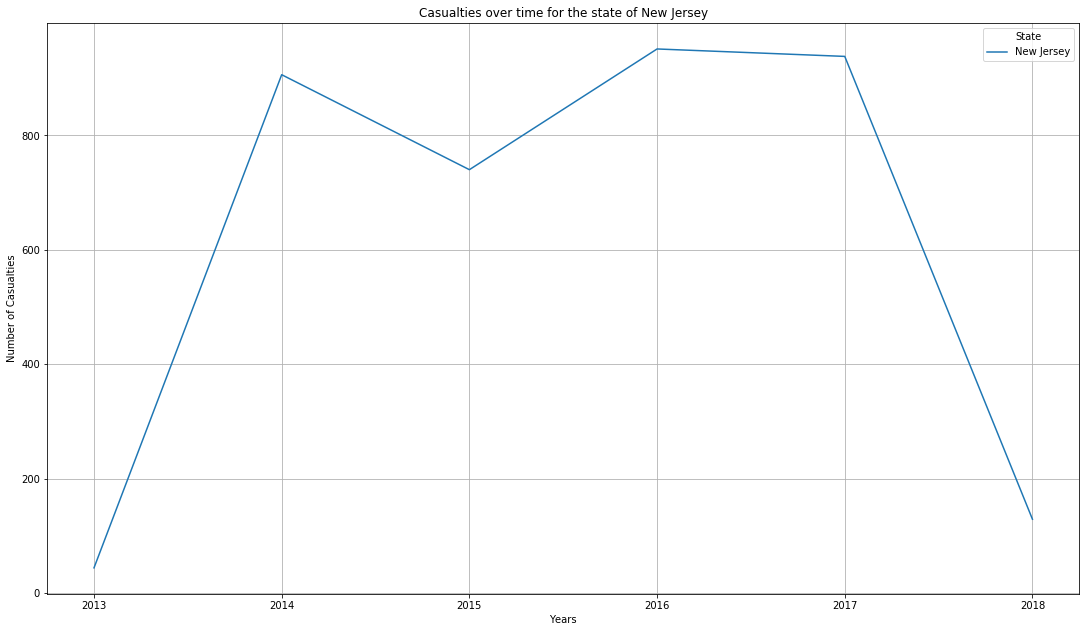

In [7]:
#This is an interactive graph , taking multiple state names as input and it shows a comparative graph
casualties_by_year_df=read_create_df_st_bars(True)
state  = input("Which state do you want to plot casualties for ? Please seperate states by a comma followed by a space.")
type(state)
sList=state.split(', ')
#print(len(sList))
ax=casualty_plot(sList,casualties_by_year_df)
ax.grid()

In [8]:
#Get year you want to see 
yr = input("Gun Violations State - Please enter the year ")
usa_gunviobyyr_df=setread_csvfile(yr,True)

Gun Violations State - Please enter the year 2017


In [9]:
#build USA map with  state where casualities happened
mapfig=buildmapbystatevio(usa_gunviobyyr_df,yr)
py.iplot( mapfig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~rgundachar/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [10]:
#build google map with lat and lng where casualities happened
usa_gunviobyyr_df=setread_csvfile(yr,False)
geomaps=gun_vio_locations(usa_gunviobyyr_df,gkey)
fig = gmaps.figure()
fig.add_layer(geomaps)
print("gmaps build completed...............")
fig

gmaps build completed...............


Figure(layout=FigureLayout(height='420px'))

Started Building Gun owndership report


cleanup_allfunctions.ipynb:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

cleanup_allfunctions.ipynb:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

cleanup_allfunctions.ipynb:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

cleanup_allfunctions.ipynb:42: SettingWithCopyWarning:


A value is trying to be set on 

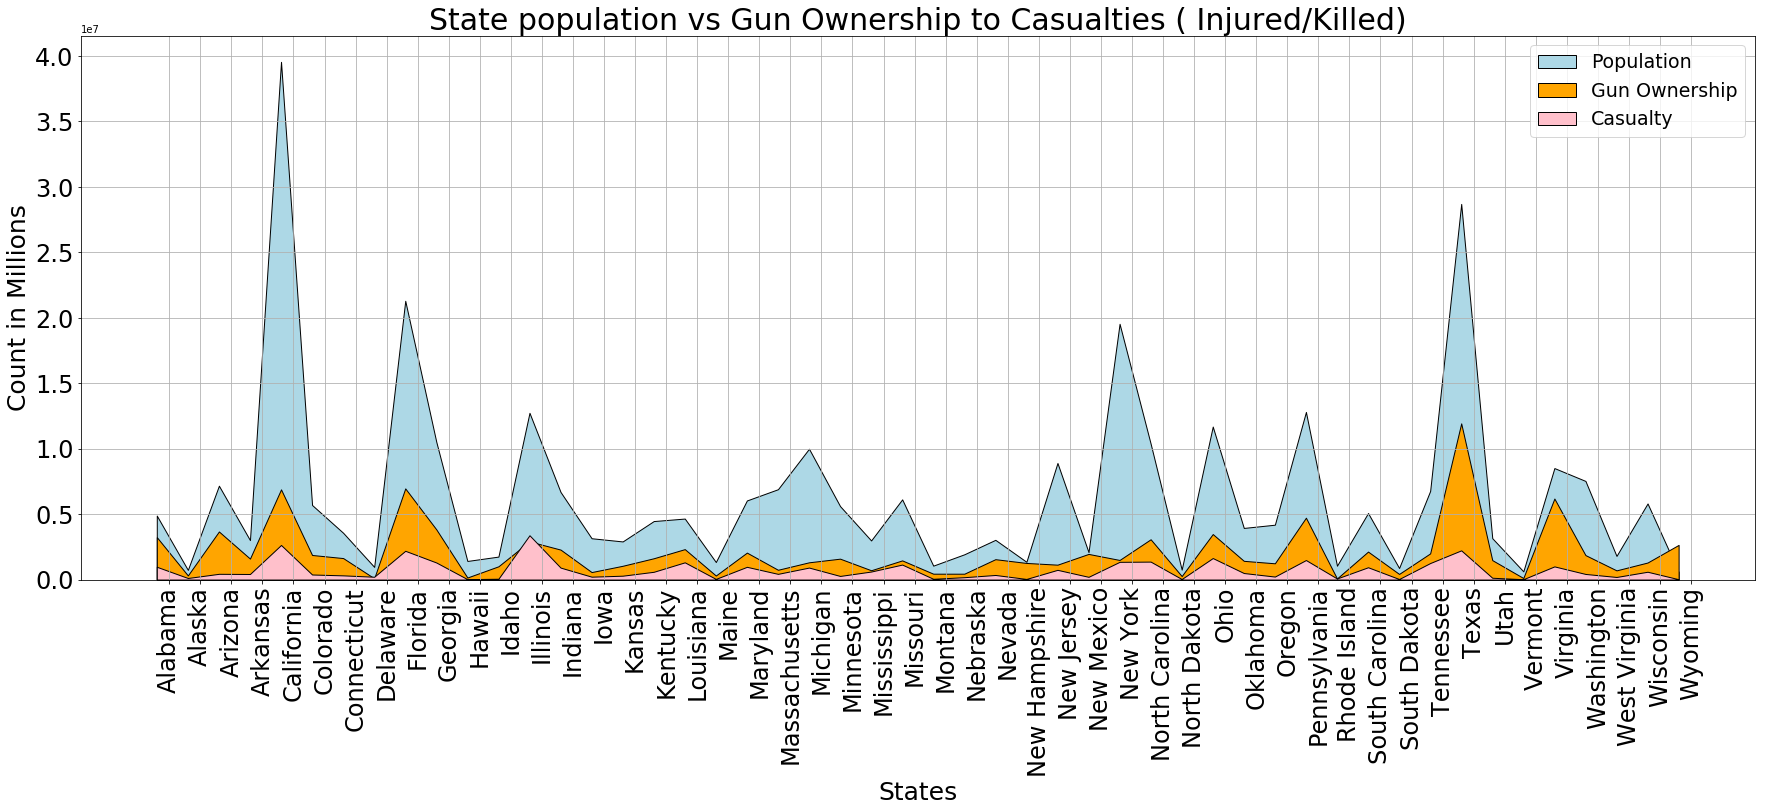

Completed Building Gun owndership report


In [11]:
#calling gun ownership report 
print("Started Building Gun owndership report")
gun_ownership_crime_report()
print("Completed Building Gun owndership report")